In [12]:
!pip install -U fortran-magic

%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import math
import py_compile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

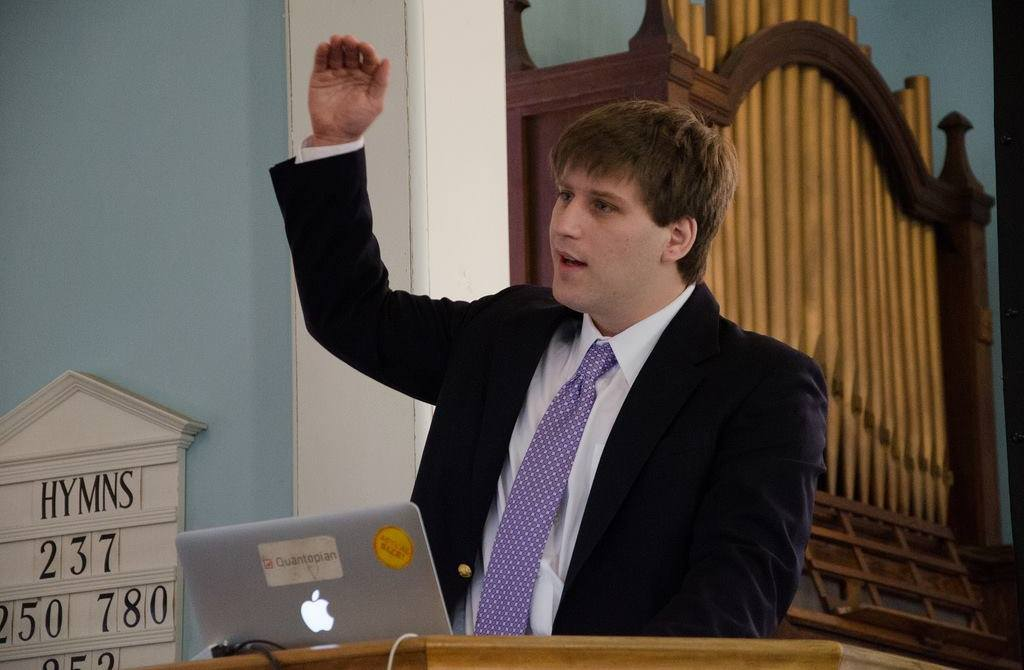

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [13]:
assert ran_the_first_cell, "Oh noes!"

**My example 1**

In [14]:
assert ran_the_first_cell, "Yes"

In [15]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

 **My example 2**

In [16]:
days = ['Mon', 'Tue', 'Wen', "Thu", 'Fry', 'Sat','Sun']
days

['Mon', 'Tue', 'Wen', 'Thu', 'Fry', 'Sat', 'Sun']

In [17]:
l = [1, 'two', 3.0, 4, 5.0, "six"]

**My example 3**

In [18]:
#My example of a list
months = ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov',12]
months

['January',
 'Feb',
 'March',
 4,
 'May',
 'June',
 7,
 'Aug',
 'Septembrer',
 'October',
 'Nov',
 12]

In [19]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My example 4**

In [20]:
# My Example
fifth = months[4]
last = months[len(months)-1]
print("Fifth:", fifth)
print("Last:", last)

Fifth: May
Last: 12


In [21]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My example 5**

In [22]:
# My Example
antepenultimate = months[-3]
first = months[-len(months)]
print("Third to last:", antepenultimate)
print("First item:", first)

Third to last: October
First item: January


In [23]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My example 6**

In [24]:
#My example of an slice of the year (Summer!)
summer = months[4:8]
summer

['May', 'June', 7, 'Aug']

In [25]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My example 7**

In [26]:
#My example
first_semester = months[:5]
first_semester

['January', 'Feb', 'March', 4, 'May']

In [27]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My example 8**

In [28]:
#My example
last_trimester = months[9:]
last_trimester

['October', 'Nov', 12]

In [29]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My example 9**

In [30]:
#My example (Months before Aug that have 31 days)
months[0:7:2]


['January', 'March', 'May', 7]

In [31]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**My example 10**

In [32]:
#My example, months reversed
months[::-1]

[12,
 'Nov',
 'October',
 'Septembrer',
 'Aug',
 7,
 'June',
 'May',
 4,
 'March',
 'Feb',
 'January']

In [33]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My example 11**

In [34]:
# Adding a new item to our months list
print("Months before:", months)
months.append('January, Again')
print("Months after:", months)

Months before: ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov', 12]
Months after: ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov', 12, 'January, Again']


In [35]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My example 12**

In [36]:
#My_example
l_2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[x /2 for x in l_2]

[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [37]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

**My example 13**

In [38]:
#My example of dictionary, mathematical constants
constants = { "Pi" : 	 3.14159, 
              "Euler" :  2.71828 ,
              "Apery" : 1.20206,
              "Golden Ratio": 1.61803,
              "Khinchin":   2.68545}
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Khinchin': 2.68545,
 'Pi': 3.14159}

In [39]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**My example 14**

In [40]:
#My example, adding yet another constant
constants['Sqrt of 2'] = 1.41421
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Khinchin': 2.68545,
 'Pi': 3.14159,
 'Sqrt of 2': 1.41421}

In [41]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

**My example 15**

In [42]:
#My example of deleting an item, Khinchin constant
del constants['Khinchin']
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Pi': 3.14159,
 'Sqrt of 2': 1.41421}

In [43]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

**My example 16**

In [44]:
#My example
constants['Pi':'Golden Ratio']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [45]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My example 17**

In [46]:
#My example of matrices
c = [[0, 2, 4, 6, 8, 10 ,12],
     [1, 3, 5, 7, 9, 11, 13]]
    

d = [[1, 1],
     [2, 4],
     [3, 9],
     [4, 16],
     [5, 25],
     [6, 26],
     [7, 49]]

In [47]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My example 18**

In [48]:
%%time

matmul(a, b)

CPU times: user 25 µs, sys: 3 µs, total: 28 µs
Wall time: 30.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My example 19**

In [49]:
#My example
%%time
matmul(c, d)

CPU times: user 55 µs, sys: 0 ns, total: 55 µs
Wall time: 60.6 µs


[[224, 1188], [252, 1318]]

In [50]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9967906635676208, 0.05839302296035165, 0.5083743026987274],
 [0.00993821379348303, 0.9542446682622241, 0.6353057417340022]]

**My example 20**

In [51]:
#My example, genereating a 5X4 random matrix
randm_2 = random_matrix(5, 4)
randm_2

[[0.9783902592488385,
  0.6789292622800954,
  0.8188163052815057,
  0.5109156715007747],
 [0.05093051406353866,
  0.7380247917702826,
  0.016867325596161664,
  0.5566141282864774],
 [0.7573719737218689,
  0.8045992558684611,
  0.6814831349926759,
  0.2973232504114056],
 [0.7598718964540989,
  0.4349365021143953,
  0.20227637111310337,
  0.4934466698630714],
 [0.2791921478331131,
  0.1056327401618169,
  0.2829452229964672,
  0.6033135491106209]]

In [52]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.3 s, sys: 22.9 ms, total: 11.3 s
Wall time: 11.5 s


**My example 21**

In [53]:
#My example, with a bigger matrix
%%time
randa_2 = random_matrix(1000, 1000)
randb_2 = random_matrix(1000, 1000)
x = matmul(randa_2, randb_2)

CPU times: user 6min 4s, sys: 1.18 s, total: 6min 5s
Wall time: 6min 11s


In [54]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

**My example 22**

In [55]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [56]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My example 23**

In [57]:
#My example, another list of data
list_data_2 = [float(i) for i in range(1000000,2000000)]
array_data_2 = np.array(list_data_2)

In [58]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 13.6 ms


333328333350000.0

**My example 24**

In [59]:
#My example, dot product with python
%%time
python_dot_product(list_data_2, list_data_2)

CPU times: user 92.2 ms, sys: 0 ns, total: 92.2 ms
Wall time: 92.4 ms


2.333331833336623e+18

In [60]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 187 µs, sys: 1 µs, total: 188 µs
Wall time: 198 µs


333328333350000.0

**My example 25**

In [61]:
#My example, dot product with fortran
%%time
fortran_dot_product(array_data_2, array_data_2)

CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.88 ms


2.333331833336623e+18

## Why is the Python Version so Much Slower?

In [62]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My example 26**

In [63]:
#My exmaple, multiplying different datatypes
mul_elemwise([True, 2 + 0j, 3, 'four'] ,[ 14, False ,'hi', 4])

[14, 0j, 'hihihi', 'fourfourfourfour']

In [64]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**My example 27**

In [65]:
#My example
source_code = 'True + b * 14.0 + c/2'
bytecode = compile(source_code, '', 'eval')
dis.dis(bytecode)

  1           0 LOAD_CONST               0 (True)
              2 LOAD_NAME                0 (b)
              4 LOAD_CONST               1 (14.0)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 LOAD_NAME                1 (c)
             12 LOAD_CONST               2 (2)
             14 BINARY_TRUE_DIVIDE
             16 BINARY_ADD
             18 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [66]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My example 28**

In [67]:
#My example, numpy array
data_2 = np.array([3.5,0,3,-45,7.5,6/2])
data_2

array([  3.5,   0. ,   3. , -45. ,   7.5,   3. ])

In [68]:
data + data

array([2, 4, 6, 8])

**My example 29**

In [69]:
#My example
(data_2*85)/2 + data_2

array([  152.25,     0.  ,   130.5 , -1957.5 ,   326.25,   130.5 ])

In [70]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 2.1 ms, sys: 1 ms, total: 3.11 ms
Wall time: 1.85 ms


333328333350000.0

**My example 30**

In [71]:
%%time
# Naive dot product over my example arry
(array_data_2 * array_data_2).sum()

CPU times: user 2.63 ms, sys: 3 ms, total: 5.64 ms
Wall time: 4.97 ms


2.3333318333335e+18

In [72]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.06 ms, sys: 6.02 ms, total: 8.08 ms
Wall time: 8.28 ms


333328333350000.0

**My example 31**

In [73]:
%%time
# Built-in dot product over my example array
array_data_2.dot(array_data_2)

CPU times: user 2.86 ms, sys: 1 ms, total: 3.86 ms
Wall time: 4.63 ms


2.3333318333329183e+18

In [74]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 1.33 ms


333328333350000.0

**My example 32**

In [75]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 183 µs, sys: 0 ns, total: 183 µs
Wall time: 189 µs


333328333350000.0

In [76]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

**My example 33**

In [77]:
#My example of writting a string into a float array
data_2[0] = "Zero"

ValueError: ignored

In [78]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

**My example 34**

In [79]:
#My example of attempting to regrow a numpy array
data_2.append(23)

AttributeError: ignored

In [80]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**My example 35**

In [81]:
#My example, giving the array a 3X2 shape
three_by_two = data_2.reshape(3, 2)
three_by_two

array([[  3.5,   0. ],
       [  3. , -45. ],
       [  7.5,   3. ]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [82]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My example 36**

In [83]:
#My example, now with an array of complex numbers
arr_2 = np.array([-1,14, 0.0, 4 + 0.j, -1.j, 8/2, 45, -5.j], dtype='complex').reshape(4, 2)
print("Array:\n", arr_2, sep='')
print("===========")
print("It's data type:", arr_2.dtype)
print("It's shape:", arr_2.shape)
print("It's strides:", arr_2.strides)
print("Data:", arr_2.data.tobytes())

Array:
[[-1.+0.j 14.+0.j]
 [ 0.+0.j  4.+0.j]
 [-0.-1.j  4.+0.j]
 [45.+0.j -0.-5.j]]
It's data type: complex128
It's shape: (4, 2)
It's strides: (32, 16)
Data: b'\x00\x00\x00\x00\x00\x00\xf0\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x00\x00\x00\xf0\xbf\x00\x00\x00\x00\x00\x00\x10@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80F@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x00\x00\x00\x14\xc0'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [84]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My example 37**

In [85]:
#My example
data_2 = np.arange(start= 100, stop = 1700, step =50).reshape(8, 4)
data_2

array([[ 100,  150,  200,  250],
       [ 300,  350,  400,  450],
       [ 500,  550,  600,  650],
       [ 700,  750,  800,  850],
       [ 900,  950, 1000, 1050],
       [1100, 1150, 1200, 1250],
       [1300, 1350, 1400, 1450],
       [1500, 1550, 1600, 1650]])

In [86]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My example 38**

In [87]:
#My example, binary operators (sum)
data_2-data_2

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [88]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

**My example 39**

In [89]:
#My example, unary function
np.log(data_2)

array([[4.60517019, 5.01063529, 5.29831737, 5.52146092],
       [5.70378247, 5.85793315, 5.99146455, 6.10924758],
       [6.2146081 , 6.30991828, 6.39692966, 6.47697236],
       [6.55108034, 6.62007321, 6.68461173, 6.74523635],
       [6.80239476, 6.85646198, 6.90775528, 6.95654544],
       [7.00306546, 7.04751722, 7.09007684, 7.13089883],
       [7.17011954, 7.20785987, 7.24422752, 7.27931884],
       [7.31322039, 7.34601021, 7.37775891, 7.40853057]])

In [90]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

**My example 40**

In [91]:
# My example
(data_2 % 20) == 0  

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [92]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

**My example 41**

In [93]:
#My example
((data_2 < 900) & (data_2 >=300))

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [94]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My example 42**

In [95]:
#My example
data_2 @ data_2.T

array([[ 135000,  275000,  415000,  555000,  695000,  835000,  975000,
        1115000],
       [ 275000,  575000,  875000, 1175000, 1475000, 1775000, 2075000,
        2375000],
       [ 415000,  875000, 1335000, 1795000, 2255000, 2715000, 3175000,
        3635000],
       [ 555000, 1175000, 1795000, 2415000, 3035000, 3655000, 4275000,
        4895000],
       [ 695000, 1475000, 2255000, 3035000, 3815000, 4595000, 5375000,
        6155000],
       [ 835000, 1775000, 2715000, 3655000, 4595000, 5535000, 6475000,
        7415000],
       [ 975000, 2075000, 3175000, 4275000, 5375000, 6475000, 7575000,
        8675000],
       [1115000, 2375000, 3635000, 4895000, 6155000, 7415000, 8675000,
        9935000]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [97]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My example 43**

In [98]:
#My example, angles
pi = np.pi
angles = np.rad2deg(np.linspace(0,np.pi,10))
angles

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.])

In [99]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My example 44**

In [100]:
#My example
angles[9]

180.0

In [101]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

**My example 45**

In [102]:
angles[:5] #My example, first 5 elements

array([ 0., 20., 40., 60., 80.])

In [103]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My example 46**

In [104]:
angles[5:] #My example, last 5 elements

array([100., 120., 140., 160., 180.])

In [105]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

**My example 47**

In [106]:
angles[::3] #My example, every 60 degrees

array([  0.,  60., 120., 180.])

In [107]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


**My example 48**

In [108]:
#My example, angles that are greater than 90
print("angles:\n", angles)
print("angles > 90", angles > 90)
print("angles[angles > 90]:\n", angles[angles > 90])

angles:
 [  0.  20.  40.  60.  80. 100. 120. 140. 160. 180.]
angles > 90 [False False False False False  True  True  True  True  True]
angles[angles > 90]:
 [100. 120. 140. 160. 180.]


In [109]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

**My example 49**

In [110]:
#My example
print(angles)
angles[[0,3,9]]

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180.]


array([  0.,  60., 180.])

In [111]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My example 50**

In [112]:
#My example
unsorted_data_2 =np.array([-8, 7, 52, -7, 6 , 8, 98,- 2])

In [113]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**My example 51**

In [114]:
#My example, sorting indexes
sort_indices_2 = np.argsort(unsorted_data_2)
sort_indices_2

array([0, 3, 7, 4, 1, 5, 2, 6])

In [115]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**My example 52**

In [116]:
unsorted_data_2[sort_indices_2] # My example, now the data is sorted

array([-8, -7, -2,  6,  7,  8, 52, 98])

In [117]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My example 53**

In [118]:
#My example, for each item, there's aprice
prices= np.array([300, 200, 13, 15, 6, 17, 23])
items = np.array(['A','B','C','D','E','F','G'])

In [119]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

**My example 54**

In [120]:
#My example, sort the items by their prices
sort_by_prices = np.argsort(prices)
items[sort_by_prices]

array(['E', 'C', 'D', 'F', 'G', 'B', 'A'], dtype='<U1')

In [121]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


**My example 55**

In [125]:
# Indexers are also useful for aligning data.
print("Other  prices:\n", repr(prices))

Other  prices:
 array([300, 200,  13,  15,   6,  17,  23])


In [126]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


**My example 56**

In [127]:
#My example
other_event_dates = pd.to_datetime(['2017-01-10', '2017-01-17', '2017-01-28']).values.astype('datetime64[D]')
print("Raw Dates:", other_event_dates)
print("Indices:", calendar.searchsorted(other_event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(other_event_dates)])

Raw Dates: ['2017-01-10' '2017-01-17' '2017-01-28']
Indices: [ 5  9 18]
Forward-Filled Dates: ['2017-01-10' '2017-01-17' '2017-01-30']


On multi-dimensional arrays, we can slice along each axis independently.

In [128]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My example 57**

In [129]:
#My example
data_2 = np.arange(56).reshape(7, 8)
data_2

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [130]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My example 58**

In [131]:
data_2[3:6,3:6] #My example, rows in range 3-5, columns in range3-5

array([[27, 28, 29],
       [35, 36, 37],
       [43, 44, 45]])

In [132]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My example 59**

In [133]:
data_2[:4,[0,4]] #My example, rows in range 0-3, first and fifth column

array([[ 0,  4],
       [ 8, 12],
       [16, 20],
       [24, 28]])

In [134]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My example 60**

In [135]:
#My example, rows where the first column is divisible by six and its greater than 0
data_2[((data_2[:, 0] % 6) == 0) & (data_2[:,0] >0)] 

array([[24, 25, 26, 27, 28, 29, 30, 31],
       [48, 49, 50, 51, 52, 53, 54, 55]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [136]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

**My example 61** standar deviation:

$Std(X) = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2 }{N}}$

In [139]:
#My example, standar deviation
def standar_deviation(x):
  return np.sqrt(((x - x.mean()) ** 2).sum() / len(x))

In [140]:
variance(np.random.standard_normal(1000))

0.9426033803698305

**My example 62**

In [141]:
#My example
standar_deviation(np.random.standard_normal(1000))


1.0007753866643645

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [142]:
data = np.arange(30)
data.mean()

14.5

**My example 63**

In [143]:
#My example
data_2 = np.arange(50)
data_2.sum()

1225

- ...but we can do more interesting things with multi-dimensional arrays.

In [144]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My example 64**

In [145]:
#My example
data_2 =  np.arange(50).reshape(5, 10)
data_2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [146]:
data.mean()

14.5

**My example 65**

In [147]:
#My example
data_2.sum()

1225

In [148]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

**My example 66**

In [149]:
#My example, sum of columns
data_2.sum(axis=0)

array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145])

In [150]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

**My example 67**

In [151]:
#My example, sum of rows
data_2.sum(axis=1)

array([ 45, 145, 245, 345, 445])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [152]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**My example 68**

In [154]:
#My example, a 11 items row, and a 4 item column
row_2 = np.array([0, 2, 4, 6, 8, 10, 12,14, 16, 18,20])
column_2= np.array([[1], [2], [3], [4]])
print("Row:\n", row_2, sep='')
print("Column:\n", column_2, sep='')

Row:
[ 0  2  4  6  8 10 12 14 16 18 20]
Column:
[[1]
 [2]
 [3]
 [4]]


In [155]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

**My example 69**

In [156]:
#My example, results in a 11X4 matrix
row_2 + column_2

array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
       [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23],
       [ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]])

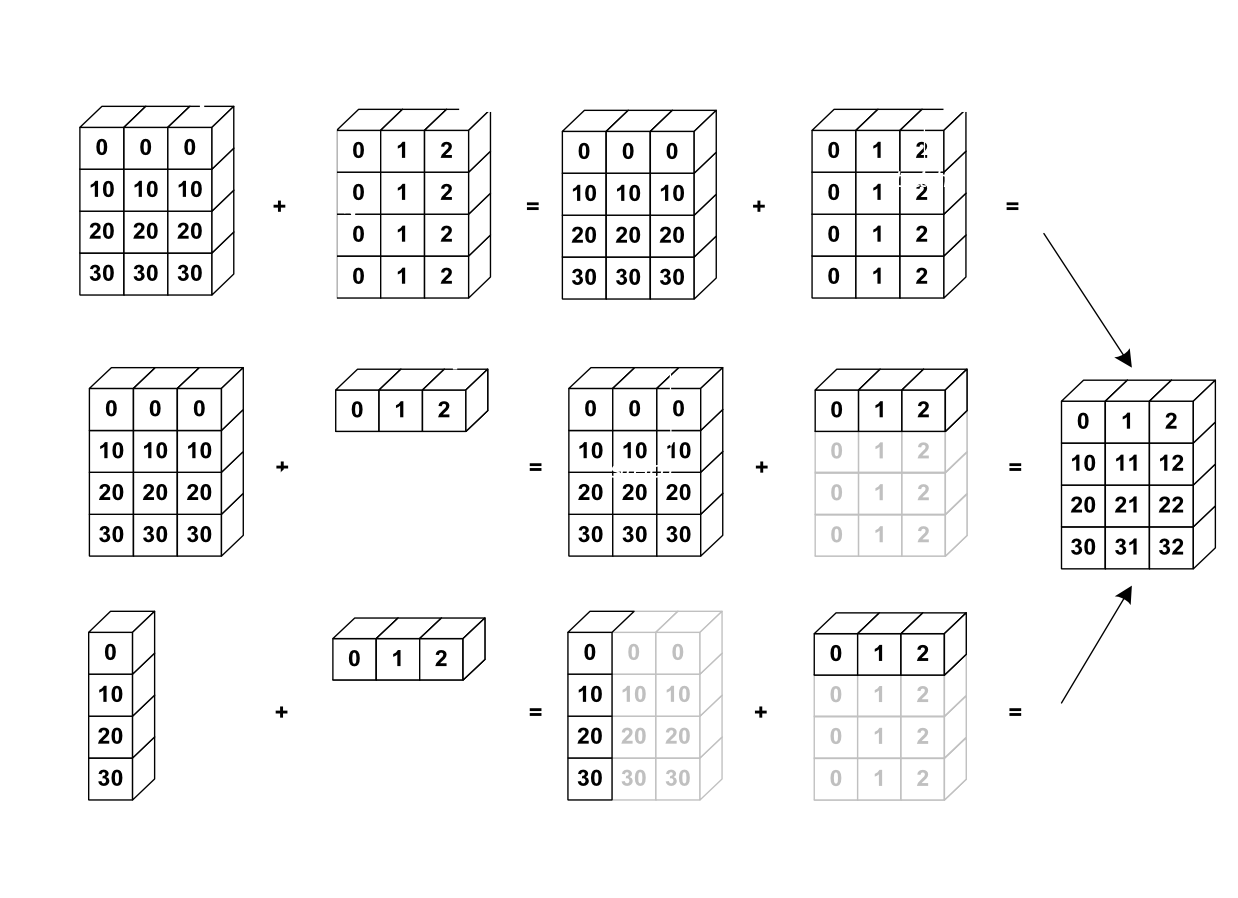

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [157]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


**My example 70**

In [159]:
#My example
print("My data:\n", data_2, sep='')
print("My mean:\n", data_2.mean(axis=0), sep='')
print("My data - Mean:\n", data_2 - data_2.mean(axis=0), sep='')

My data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
My mean:
[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
My data - Mean:
[[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [160]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**My example 71**

In [161]:
#My example
s_2 =pd.Series(index=['a', 'b', 'c', 'd', 'e','f','g','h'], data=[7.2, 2.5, -3.4, 4.4, 5, 4.001, 3.2, -2])
s_2

a    7.200
b    2.500
c   -3.400
d    4.400
e    5.000
f    4.001
g    3.200
h   -2.000
dtype: float64

In [162]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**My example 72**

In [163]:
#My example
print("The index is:", s_2.index)
print("The values are:", s_2.values)

The index is: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')
The values are: [ 7.2    2.5   -3.4    4.4    5.     4.001  3.2   -2.   ]


In [164]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**My example 73**

In [165]:
#My example, looking up by position
s_2.iloc[6]

3.2

In [166]:
# ... or by label.
s.loc['a']

1

**My example 74**

In [167]:
#My example, looking up by label
s_2.loc['g']

3.2

In [168]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**My example 75**

In [169]:
#My example
s_2.iloc[2:6]

c   -3.400
d    4.400
e    5.000
f    4.001
dtype: float64

In [170]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**My example 76**

In [171]:
#My example
s_2.loc['d':]

d    4.400
e    5.000
f    4.001
g    3.200
h   -2.000
dtype: float64

In [172]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**My example 77**

In [173]:
#My example, third, fourth and last column
s_2.iloc[[2,3, 7]]

c   -3.4
d    4.4
h   -2.0
dtype: float64

In [174]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**My example 78**

In [175]:
#My example
s_2[s_2>3]

a    7.200
d    4.400
e    5.000
f    4.001
g    3.200
dtype: float64

In [176]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**My example 79**

In [177]:
#My exampler, second series
other_s_2 = pd.Series({'d': 3.14, 'e': -1.4, 'f': 0, 'h': 6, 'i': 2.3, 'j':7})
other_s_2

d    3.14
e   -1.40
f    0.00
h    6.00
i    2.30
j    7.00
dtype: float64

In [178]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**My example 80**

In [179]:
#My example, series substraction, if not defined in one column, substracion is going to be NaN
other_s_2 - s_2

a      NaN
b      NaN
c      NaN
d   -1.260
e   -6.400
f   -4.001
g      NaN
h    8.000
i      NaN
j      NaN
dtype: float64

In [180]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**My example 81**

In [181]:
#My example, filling with 2
(other_s_2 - s_2).fillna(2.0)

a    2.000
b    2.000
c    2.000
d   -1.260
e   -6.400
f   -4.001
g    2.000
h    8.000
i    2.000
j    2.000
dtype: float64

In [184]:
import yfinance as yf      

In [185]:
# Most real datasets are read in from an external file format.
aapl = apple_prices =  yf.download("AAPL", start="2012-01-01", end="2016-01-01")
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575917,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643501,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783866,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917508,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897019,394024400


**My example 82**

In [187]:
#My example
goog = yf.download("GOOG", start="2012-01-01", end="2016-01-01")
goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,325.250885,332.827484,324.966949,331.462585,331.462585,7380561
2012-01-04,331.273315,333.873566,329.076538,332.892242,332.892242,5749470
2012-01-05,329.828735,330.745270,326.889740,328.274536,328.274536,6590410
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987
2012-01-09,322.042908,322.291962,309.455078,310.067780,310.067780,11688849


In [188]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2012-01-03,14.621429,14.732143
2012-01-04,14.642857,14.810000


**My example 83**

In [189]:
#My example
goog.iloc[30:35, 4:6]

,Adj Close,Volume
Date,,
2012-02-15,301.649353,4869986
2012-02-16,302.127563,5080773
2012-02-17,301.191071,4916560
2012-02-21,305.853577,4980197
2012-02-22,302.834900,3948746


In [192]:
aapl.loc[pd.Timestamp('2012-02-01'):pd.Timestamp('2012-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2012-02-01,16.292500,270046000
2012-02-02,16.254286,186796400
2012-02-03,16.417143,286599600


**My example 84**

In [191]:
#My example
goog.loc[pd.Timestamp('2014-06-01'):pd.Timestamp('2015-06-01'), ['High', 'Low']]

,High,Low
Date,,
2014-06-02,559.364258,544.235779
2014-06-03,550.827698,541.064514
2014-06-04,547.107910,537.274902
2014-06-05,553.430542,542.959290
2014-06-06,556.532043,547.427063
...,...,...
2015-05-26,539.000000,529.880005
2015-05-27,540.549988,531.710022
2015-05-28,540.609985,536.250000


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

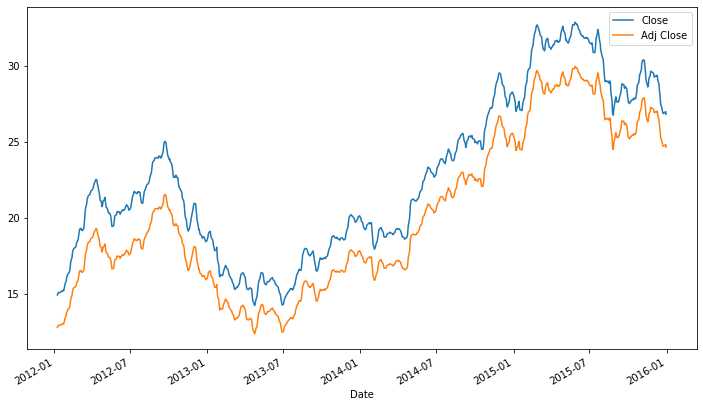

In [193]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**My example 85**

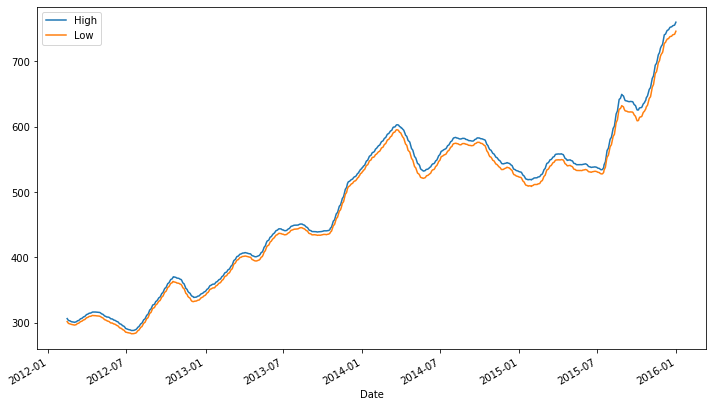

In [194]:
#My example
goog.rolling(30)[['High', 'Low']].mean().plot();

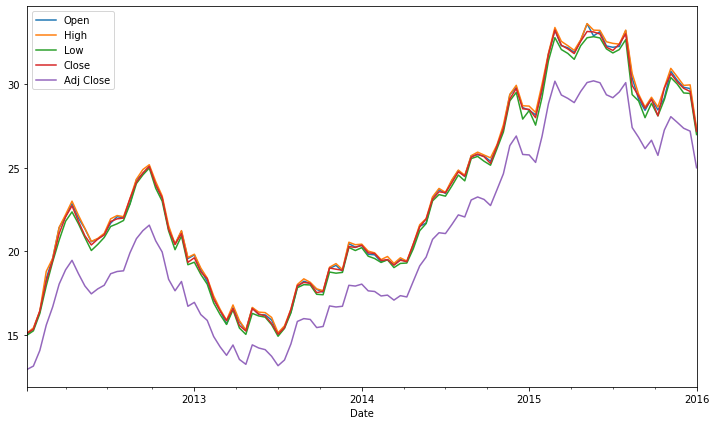

In [195]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

**My example 86**

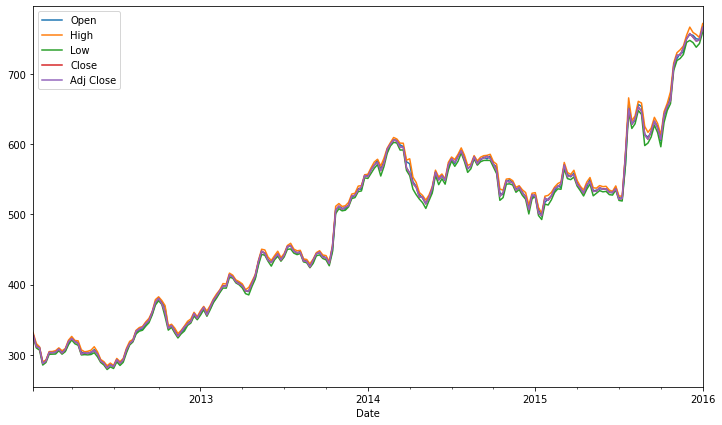

In [196]:
#My example, using the mean of eah week period
goog.drop('Volume', axis=1).resample('W').mean().plot();

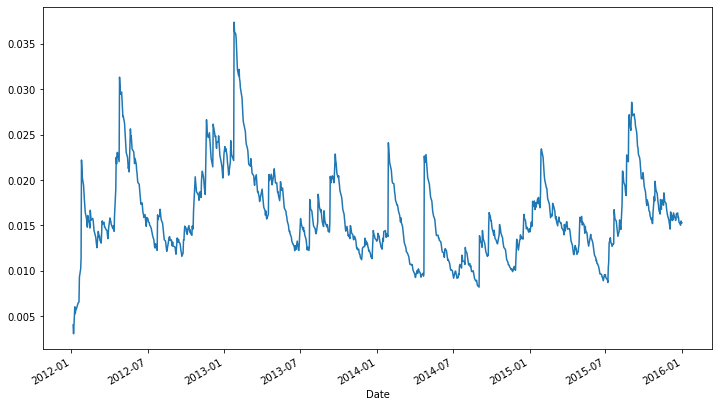

In [197]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**My example 87**

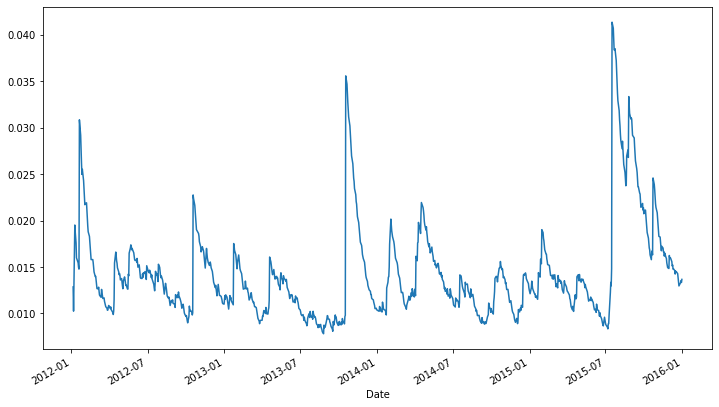

In [198]:
# My example of 30-day rolling exponentially-weighted stddev of returns.
goog['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [209]:
!git clone <urlOfRepository>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <urlOfRepository>'


In [211]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [212]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

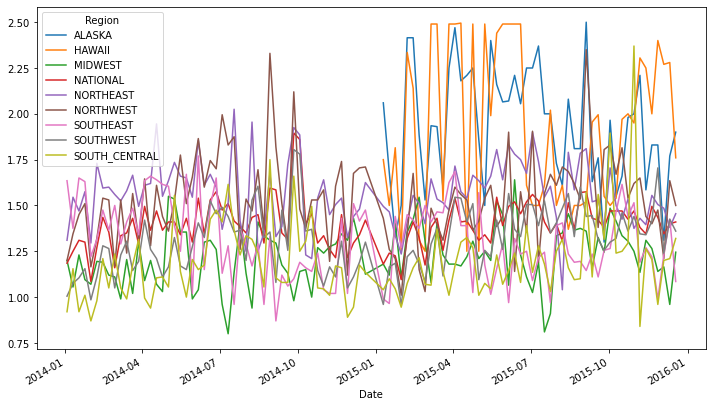

In [213]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [214]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

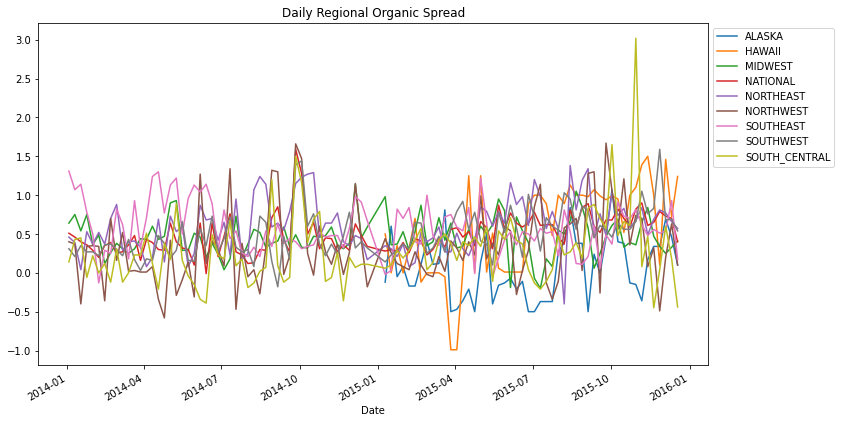

In [215]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [216]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


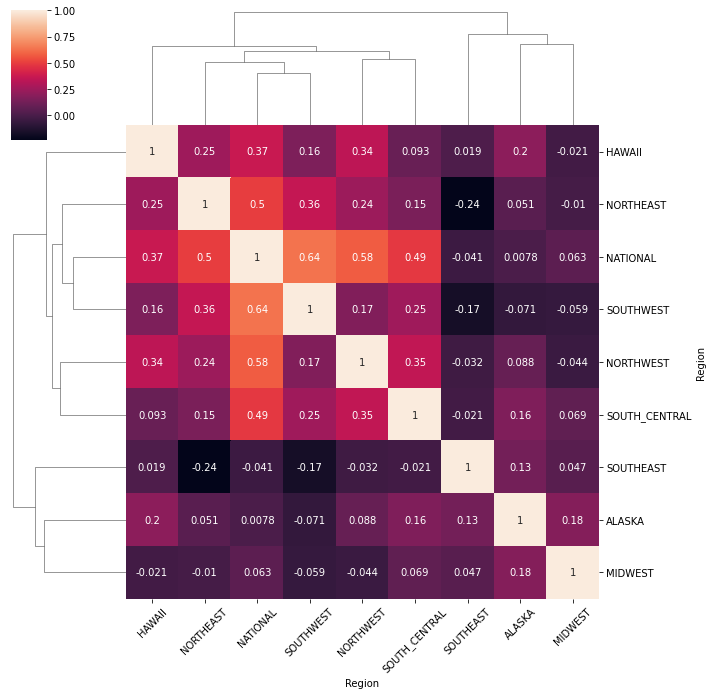

In [217]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#My analyisis

A dataset was downloaded from https://www.datos.gov.co/, which contains the international entries to the colombian territory since 2012. The data was downloaded as a `csv` file, and was uploaded to this project as a dataframe. However, there was no date column to be found, only `Year` and `Month`, so this information was used in order to make a column called `Mes Viaje`,which refers to a date with a monthly frecuency

In [221]:
dict ={ 'Enero':'01',
      'Febrero':"02",
      'Marzo':"03",
      'Abril':'04',
      'Mayo':'05',
      'Junio':'06',
      'Julio':'07',
      'Agosto':'08',
      'Septiembre':'09',
      'Octubre':'10',
      'Noviembre':'11',
      'Diciembre':'12'
}
w = lambda x: dict[x]
y = lambda x: str(x)

fields= ['Año','Mes']
dates = pd.read_csv('EXT.csv', converters= {'Mes':w,'Año':y}, usecols=fields)
dates = pd.to_datetime(dates['Año']+ "-"+ dates['Mes']+"-01")
dates.name = 'Mes Viaje'

In [222]:
fields = ['Nacionalidad',	'Codigo Iso 3166',	'Femenino',	'Masculino',	'Indefinido',	'Total',	'Latitud - Longitud']
entries = pd.read_csv('EXT.csv', usecols=fields)
entries = pd.concat([dates,entries],axis=1)
entries.head()

,Mes Viaje,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Indefinido,Total,Latitud - Longitud
0,2012-01-01,Islas Alboran y Perejil,99999,1,0,NaN,1,"(4.697144,-74.140516)"
1,2012-01-01,Albania,8,1,2,NaN,3,"(4.697144,-74.140516)"
2,2012-01-01,Alemania,276,11,16,NaN,27,"(-4.197703,-69.941278)"
3,2012-01-01,Alemania,276,1,1,NaN,2,"(0.25129,-76.875963)"
4,2012-01-01,Alemania,276,63,102,NaN,165,"(0.814836,-77.662532)"


The data contains the following columns, each of which have the following data types:

In [223]:
entries.dtypes

Mes Viaje             datetime64[ns]
Nacionalidad                  object
Codigo Iso 3166                int64
Femenino                       int64
Masculino                      int64
Indefinido                   float64
Total                          int64
Latitud - Longitud            object
dtype: object

The following are the 9 countries that historically cumulated the most entries to the colombian territories.

In [224]:
p = entries.groupby(['Nacionalidad'])['Total'].sum()
most_visitors = p[p>750000]
most_visitors

Nacionalidad
Argentina                    1306725
Brasil                       1295494
Chile                        1021976
Ecuador                      1296451
España                       1059068
Estados Unidos de America    3880996
Mexico                       1179849
Peru                         1084793
Venezuela                    5215058
Name: Total, dtype: int64

This countries are the ones that are going to be under the lens of the next analysis

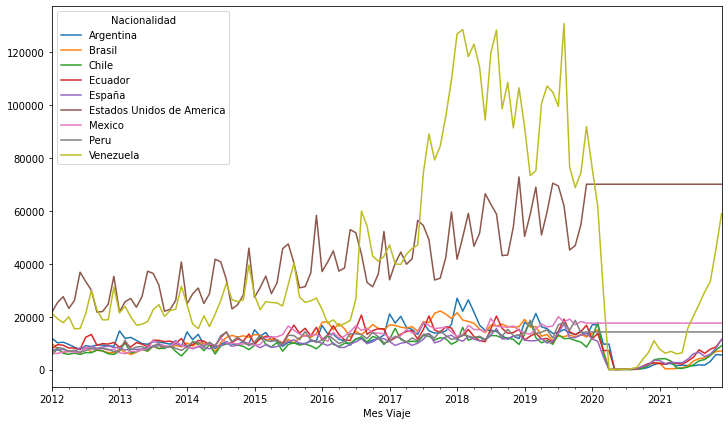

In [225]:
# What's the total amount of people that has been entering colombian territory by each country
visitors = entries[entries.Nacionalidad.isin(most_visitors.index)]
visitors.groupby(['Mes Viaje', 'Nacionalidad'])['Total'].sum().unstack().ffill().plot();

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!